In [ ]:
#MAJOR PROJECT-1

#Choose any dataset of your choice and apply a suitable CLASSIFIER/REGRESSOR

In [ ]:
#DATASET-BRAIN-STROKE
#URL-/content/brain_stroke.csv

In [ ]:
#CREATION OF DATAFRAME
import pandas as pd
df=pd.read_csv('/content/brain_stroke.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [ ]:
df.shape
#Rows-4981,Columns-11

(4981, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
#Here I create another dataframe from the existing one which contains only float and int datatypes values
df_num= df.select_dtypes(include = ['float64','int64'])
df_num

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,80.0,0,1,105.92,32.5,1
2,49.0,0,0,171.23,34.4,1
3,79.0,1,0,174.12,24.0,1
4,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0
4977,40.0,0,0,191.15,31.1,0
4978,45.0,1,0,95.02,31.8,0
4979,40.0,0,0,83.94,30.0,0


In [ ]:
#I want to know how many no of stokes are there
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

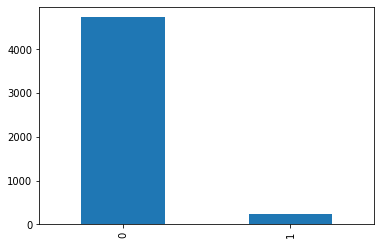

In [ ]:
#Visualisation
df['stroke'].value_counts().plot(kind = 'bar')

In [ ]:
#Divide the data into input and output
#input data
x = df_num.iloc[:,0:5].values 
x

array([[ 67.  ,   0.  ,   1.  , 228.69,  36.6 ],
       [ 80.  ,   0.  ,   1.  , 105.92,  32.5 ],
       [ 49.  ,   0.  ,   0.  , 171.23,  34.4 ],
       ...,
       [ 45.  ,   1.  ,   0.  ,  95.02,  31.8 ],
       [ 40.  ,   0.  ,   0.  ,  83.94,  30.  ],
       [ 80.  ,   1.  ,   0.  ,  83.75,  29.1 ]])

In [ ]:
#output data
y = df_num.iloc[:,5].values
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
#Train_test_split/train and test variables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
print(x.shape)
print(x_train.shape) 
print(x_test.shape)

(4981, 5)
(3735, 5)
(1246, 5)


In [ ]:
print(y.shape)
print(y_train.shape) 
print(y_test.shape) 

(4981,)
(3735,)
(1246,)


In [ ]:
#NORMALISATION or SCALING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [ ]:
#Apply Classifier/Regressor 
#Here I apply Regressor
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
#Fitting the model
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Predict the output
y_pred = model.predict(x_test)
y_pred #PREDCITED VALUES

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)* 100

95.26484751203851

In [ ]:
#Individual Prediction
m= scaler.transform([[81.0,0,0,186.21,29.0]])

In [ ]:
model.predict(m)

array([0])

In [ ]:
m

array([[0.98779297, 0.        , 0.        , 0.61970098, 0.42816092]])